In [1]:
% matplotlib inline

In [2]:
import gdal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geotiling import GeoProps

In [3]:
def normalize(arr):
    ''' Function to normalize an input array to 0-1 '''
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)

In [4]:
!head -n 20 /mnt/bucket_files.txt 

/mnt/mounted_bucket/s1_median_bangladesh_vis_500x500_999.0.tif
mounted_bucket/Bangladesh_CE_2011.csv
mounted_bucket/Bangladesh_CE_2015.csv
mounted_bucket/India_pov_pop.csv
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_1000.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_100.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_1001.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_1002.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_1003.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_1004.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_1005.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_1006.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_1007.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_1008.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_1009.0.tif
mounted_bucket/l8_median_bangladesh_2011_multiband_500x500_

In [5]:
bangladesh_2011 = pd.read_csv("/mnt/mounted_bucket/Bangladesh_CE_2011.csv")

In [6]:
bangladesh_2015 = pd.read_csv("/mnt/mounted_bucket/Bangladesh_CE_2015.csv")

In [7]:
india = pd.read_csv("/mnt/mounted_bucket/India_pov_pop.csv")

In [8]:
source_tiff = "/mnt/mounted_bucket/s1_median_bangladesh_multiband_500x500_4321.0.tif"

In [9]:
props = GeoProps()
gdal_tif = gdal.Open(source_tiff)
props.import_geogdal(gdal_tif)

In [49]:
!gdalinfo /mnt/mounted_bucket/s1_median_bangladesh_multiband_500x500_4321.0.tif

Driver: GTiff/GeoTIFF
Files: /mnt/mounted_bucket/s1_median_bangladesh_multiband_500x500_4321.0.tif
Size is 500, 500
Coordinate System is:
PROJCS["WGS 84 / UTM zone 46N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",93],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AUTHORITY["EPSG","32646"]]
Origin = (209281.988906211801805,2508217.692190284840763)
Pixel Size = (10.000000000000000,-10.000000000000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=PIXEL
Corner Coordinates:

In [10]:
#center_lon, center_lat = props.get_affinecoord(176415.000, 2532975.000)
center_lon, center_lat = props.get_georefcoord(211785.000, 2505735.000)
print center_lon, center_lat

90.1959352984 22.6341331408


In [11]:
A = gdal_tif.ReadAsArray()

In [12]:
#A = A[0:3]
A = np.uint8(A)
A.shape

(5, 500, 500)

In [13]:
np.transpose(A, (1,2,0)).shape

(500, 500, 5)

In [14]:
# approximately 9 miles by 9 mile

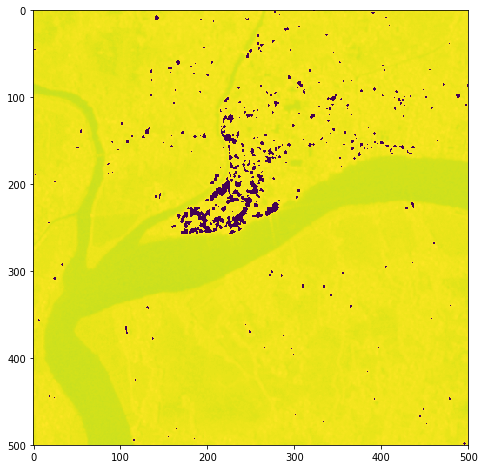

In [18]:
plt.figure(figsize=(8, 8))
#plt.imshow(np.transpose(A, (1,2,0)))
plt.imshow(A[3])